In [1]:
# Logistic Regression model for detection of Fraud

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Data for analysis
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.shape

(284807, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# we can see the target variable is integer so we changing to string to distinguish between Fraud and No fraud
data['Class'] = data['Class'].astype(str)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# As in the Target column Class we have values as 0 and 1 we are changing to Fraud or No-Fraud
data['Class'].replace(to_replace = '0', value='No_Frauds', inplace = True)
data['Class'].replace(to_replace='1', value='Frauds', inplace=True)

In [12]:
#Checking the count of target variable column
data['Class'].value_counts()

No_Frauds    284315
Frauds          492
Name: Class, dtype: int64

In [13]:
# Divinding data into dependent and independent variable
data_credit = data.copy()
data_credit.columns
data_credit.drop(['Class'], axis=1, inplace=True)
target_data = pd.DataFrame(data['Class'])

In [14]:
data_credit.describe().round(2)

Time         V1         V2         V3         V4         V5  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean    94813.86       0.00       0.00      -0.00       0.00      -0.00   
std     47488.15       1.96       1.65       1.52       1.42       1.38   
min         0.00     -56.41     -72.72     -48.33      -5.68    -113.74   
25%     54201.50      -0.92      -0.60      -0.89      -0.85      -0.69   
50%     84692.00       0.02       0.07       0.18      -0.02      -0.05   
75%    139320.50       1.32       0.80       1.03       0.74       0.61   
max    172792.00       2.45      22.06       9.38      16.88      34.80   

              V6         V7         V8         V9  ...        V20        V21  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00      -0.00      -0.00      -0.00  ...       0.00       0.00   
std         1.33       1.24       1.19       1.10  ...       0.77       0.73   
min       -26.16     -43.56     -73.22     -13.43  ...     -54.50     -34.83   
25%        -0.77      -0.55      -0.21      -0.64  ...      -0.21      -0.23   
50%        -0.27       0.04       0.02      -0.05  ...      -0.06      -0.03   
75%         0.40       0.57       0.33       0.60  ...       0.13       0.19   
max        73.30     120.59      20.01      15.59  ...      39.42      27.20   

             V22        V23        V24        V25        V26        V27  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean        0.00       0.00       0.00       0.00       0.00      -0.00   
std         0.73       0.62       0.61       0.52       0.48       0.40   
min       -10.93     -44.81      -2.84     -10.30      -2.60     -22.57   
25%        -0.54      -0.16      -0.35      -0.32      -0.33      -0.07   
50%         0.01      -0.01       0.04       0.02      -0.05       0.00   
75%         0.53       0.15       0.44       0.35       0.24       0.09   
max        10.50      22.53       4.58       7.52       3.52      31.61   

             V28     Amount  
count  284807.00  284807.00  
mean       -0.00      88.35  
std         0.33     250.12  
min       -15.43       0.00  
25%        -0.05       5.60  
50%         0.01      22.00  
75%         0.08      77.16  
max        33.85   25691.16  

[8 rows x 30 columns]

In [15]:
target_data.describe()

Class
count      284807
unique          2
top     No_Frauds
freq       284315

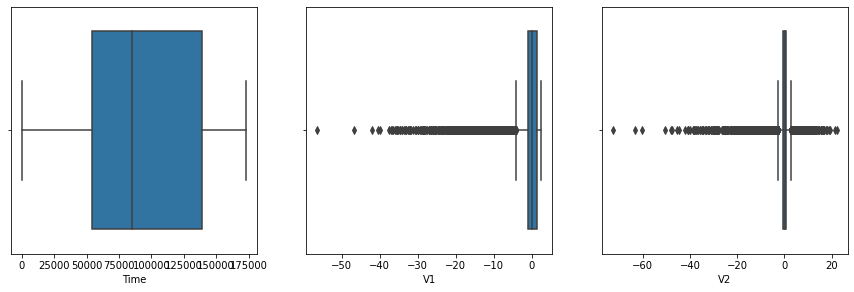

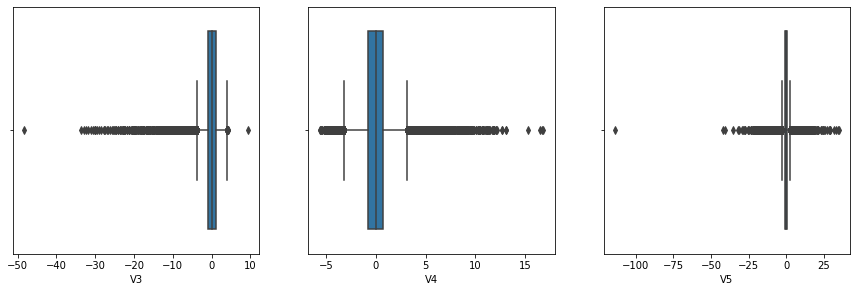

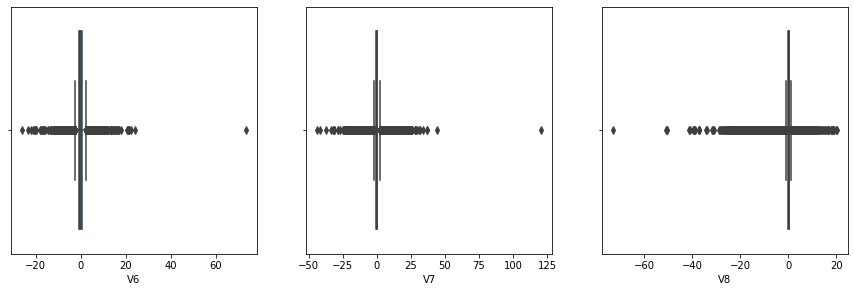

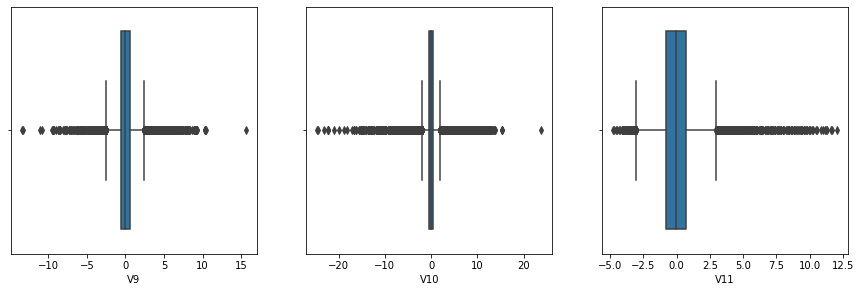

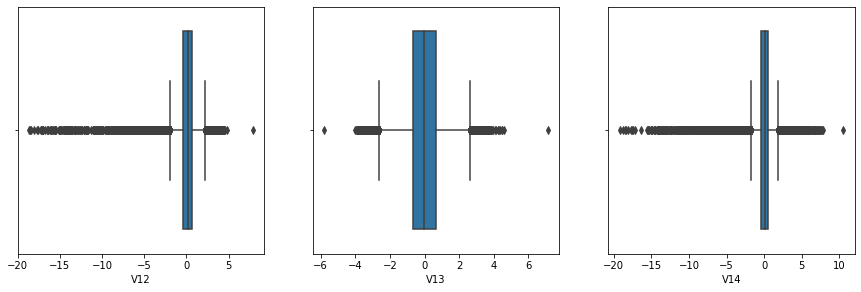

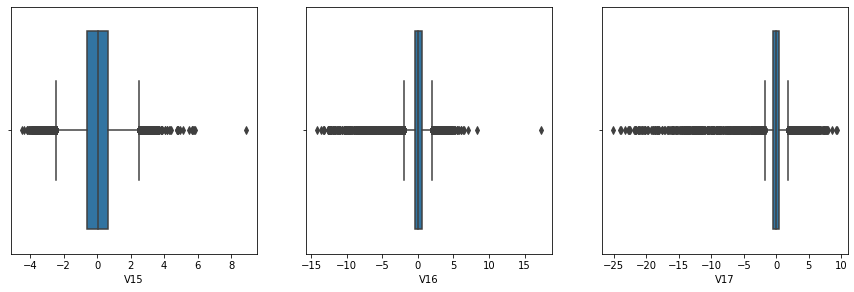

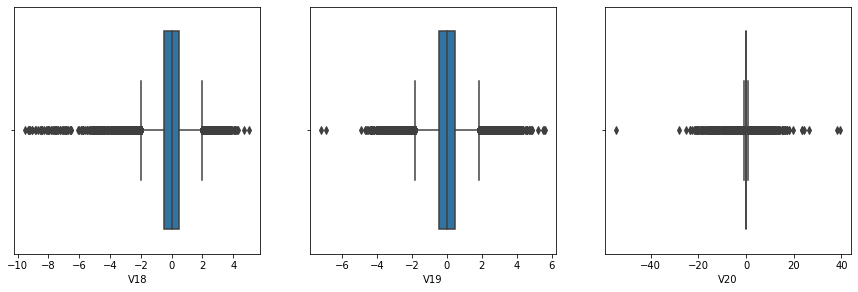

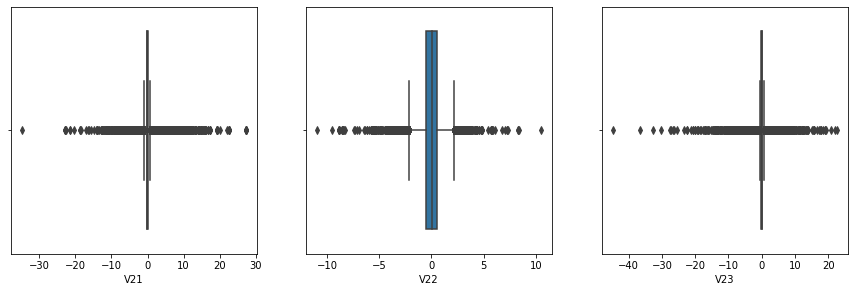

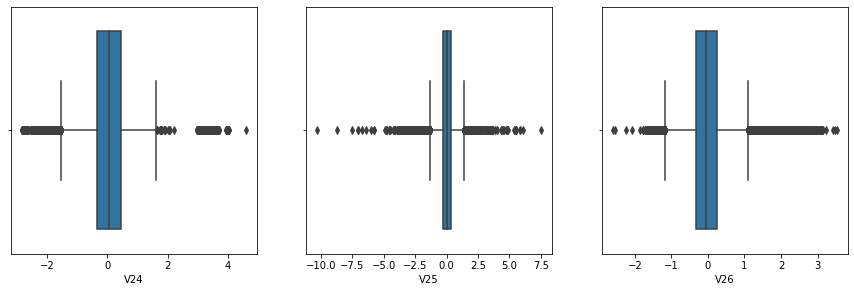

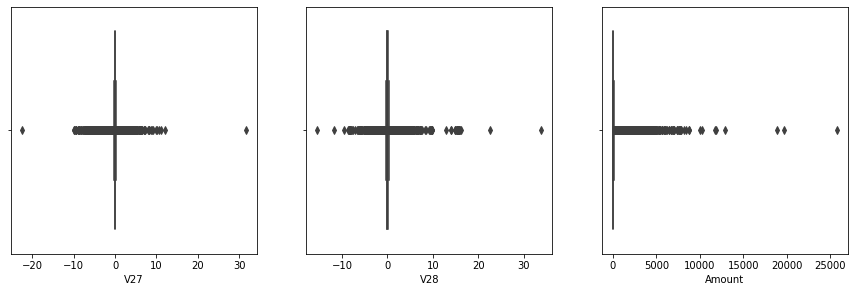

<Figure size 1080x720 with 0 Axes>

In [16]:
# As we are building Logistic Regression we need to check for outliers
plt.figure(figsize=(15,10))
c = 1
for col in data_credit.columns:
    if (c<=3):
        plt.subplot(2,3,c)
        sns.boxplot(data=data_credit, x=col)
    c+=1
    if c==4:
        plt.figure(figsize=(15,10))
        c=1

In [17]:
# As here we can see the data variation between Time and other column is too much so we are scaling the data
# using Robust Scaling as the data as the data contains outliers 
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

data_credit['scaled_time'] = rob_scaler.fit_transform(data_credit['Time'].values.reshape(-1,1))
data_credit['scaled_amount'] = rob_scaler.fit_transform(data_credit['Amount'].values.reshape(-1,1))
data_credit.drop(['Time','Amount'], axis=1, inplace=True)

In [18]:
data_credit.describe().round(2)

V1         V2         V3         V4         V5         V6  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean        0.00       0.00      -0.00       0.00      -0.00       0.00   
std         1.96       1.65       1.52       1.42       1.38       1.33   
min       -56.41     -72.72     -48.33      -5.68    -113.74     -26.16   
25%        -0.92      -0.60      -0.89      -0.85      -0.69      -0.77   
50%         0.02       0.07       0.18      -0.02      -0.05      -0.27   
75%         1.32       0.80       1.03       0.74       0.61       0.40   
max         2.45      22.06       9.38      16.88      34.80      73.30   

              V7         V8         V9        V10  ...        V21        V22  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean       -0.00      -0.00      -0.00       0.00  ...       0.00       0.00   
std         1.24       1.19       1.10       1.09  ...       0.73       0.73   
min       -43.56     -73.22     -13.43     -24.59  ...     -34.83     -10.93   
25%        -0.55      -0.21      -0.64      -0.54  ...      -0.23      -0.54   
50%         0.04       0.02      -0.05      -0.09  ...      -0.03       0.01   
75%         0.57       0.33       0.60       0.45  ...       0.19       0.53   
max       120.59      20.01      15.59      23.75  ...      27.20      10.50   

             V23        V24        V25        V26        V27        V28  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean        0.00       0.00       0.00       0.00      -0.00      -0.00   
std         0.62       0.61       0.52       0.48       0.40       0.33   
min       -44.81      -2.84     -10.30      -2.60     -22.57     -15.43   
25%        -0.16      -0.35      -0.32      -0.33      -0.07      -0.05   
50%        -0.01       0.04       0.02      -0.05       0.00       0.01   
75%         0.15       0.44       0.35       0.24       0.09       0.08   
max        22.53       4.58       7.52       3.52      31.61      33.85   

       scaled_time  scaled_amount  
count    284807.00      284807.00  
mean          0.12           0.93  
std           0.56           3.50  
min          -0.99          -0.31  
25%          -0.36          -0.23  
50%           0.00           0.00  
75%           0.64           0.77  
max           1.04         358.68  

[8 rows x 30 columns]

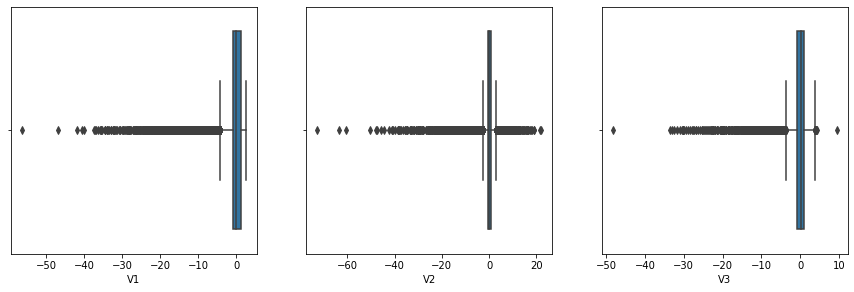

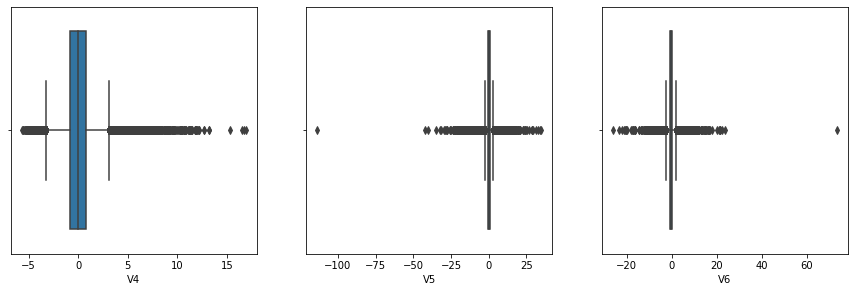

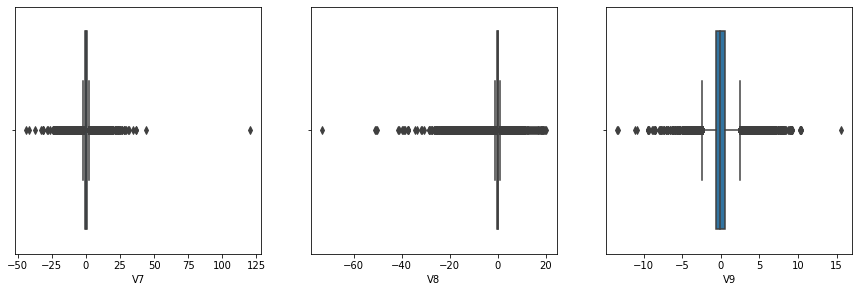

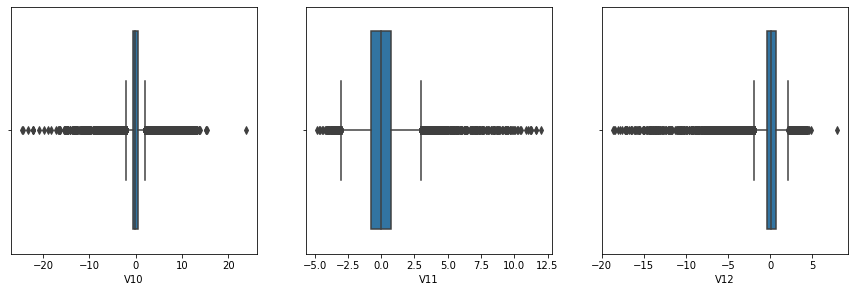

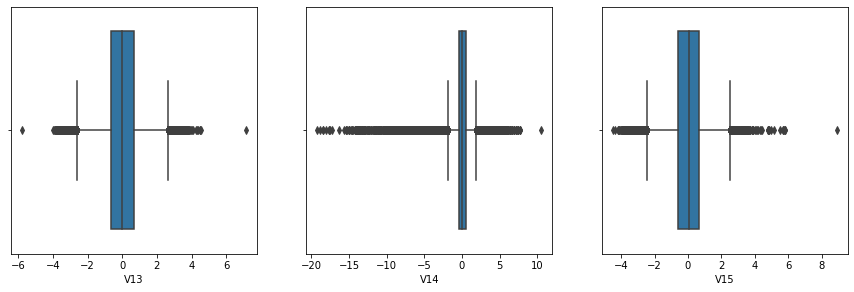

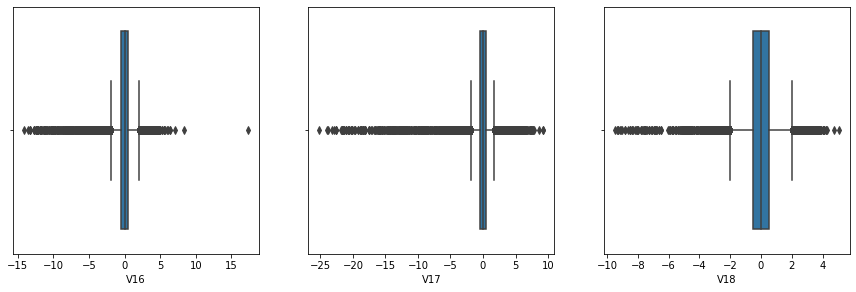

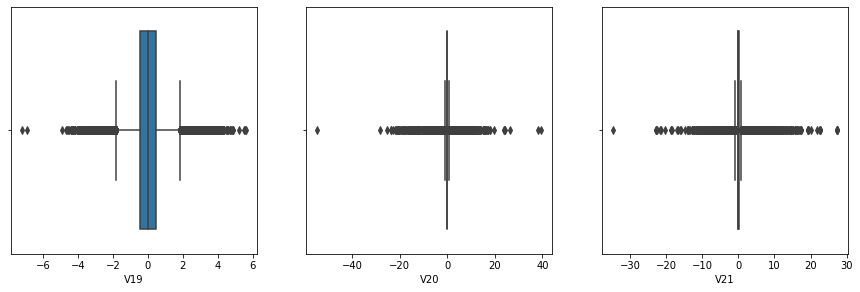

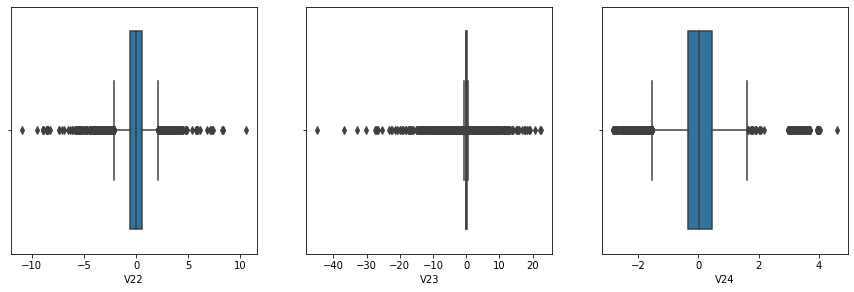

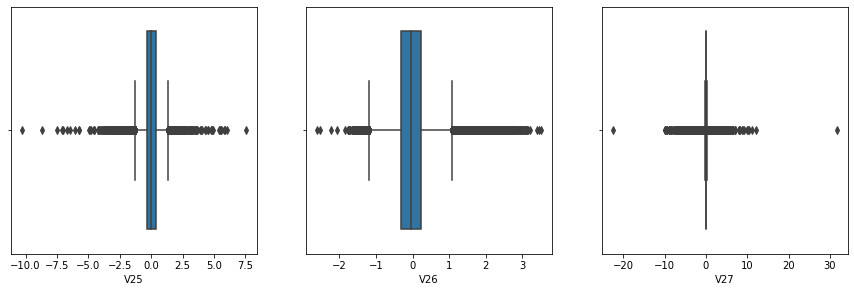

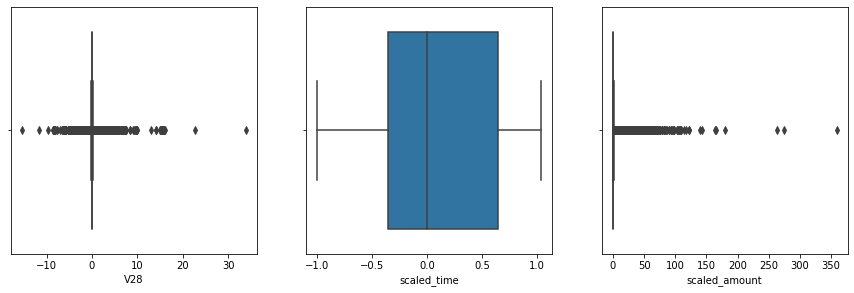

<Figure size 1080x720 with 0 Axes>

In [19]:
# Again checking for outlier
c=1
plt.figure(figsize=(15,10))
for col in data_credit.columns:
    if c<=3:
        plt.subplot(2,3,c)
        sns.boxplot(data=data_credit, x=col)    
    c+=1
    
    if c==4:
        plt.figure(figsize=(15,10))
        c=1

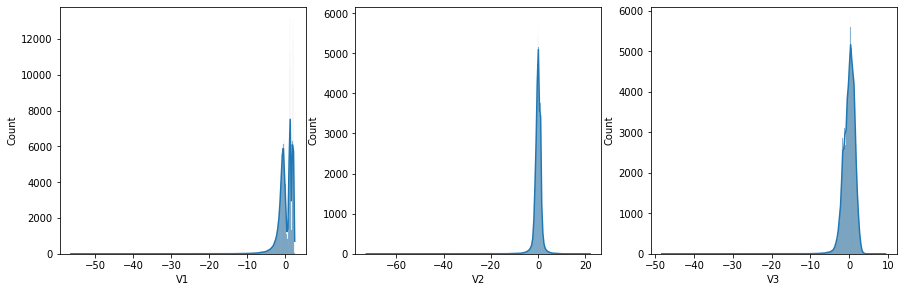

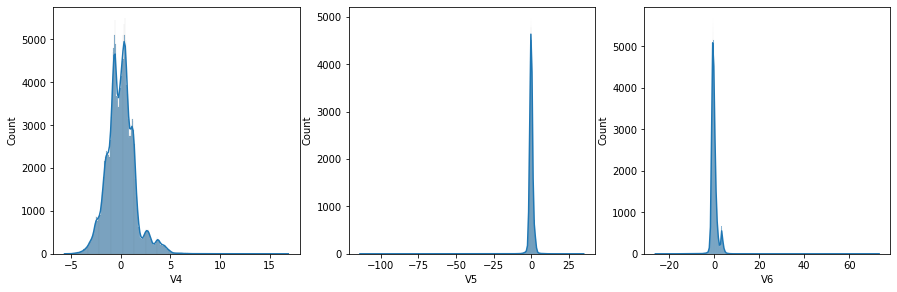

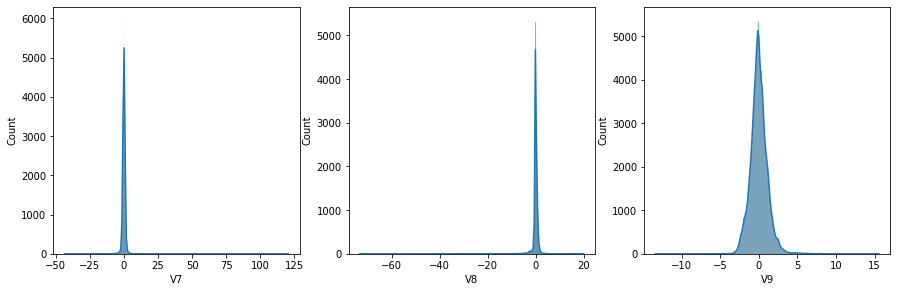

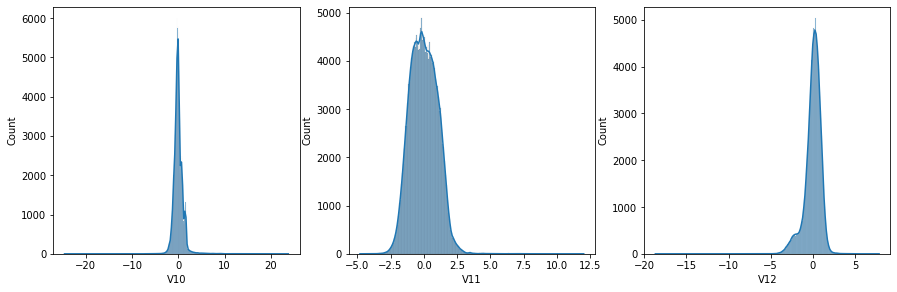

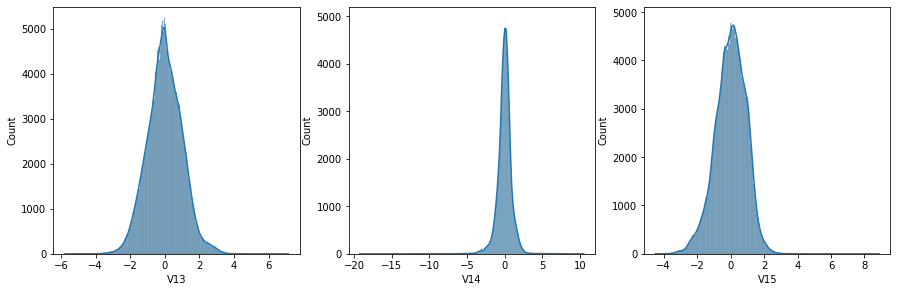

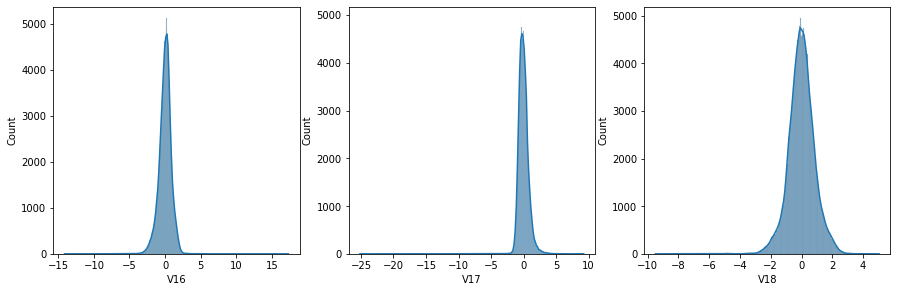

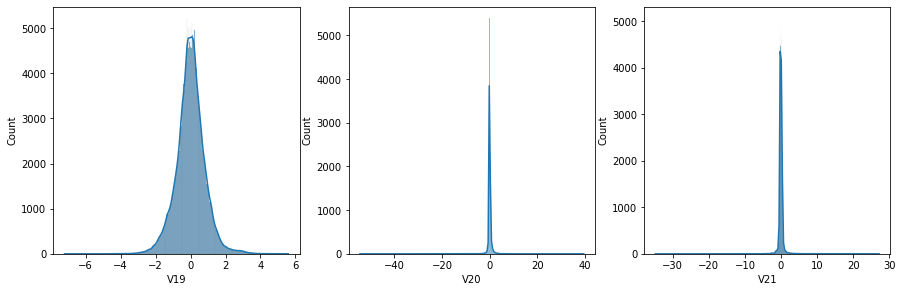

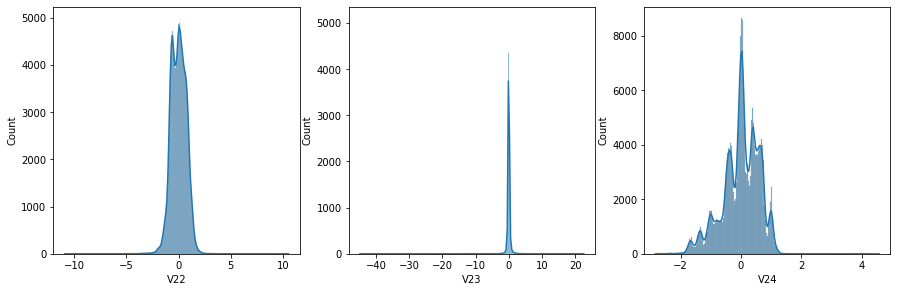

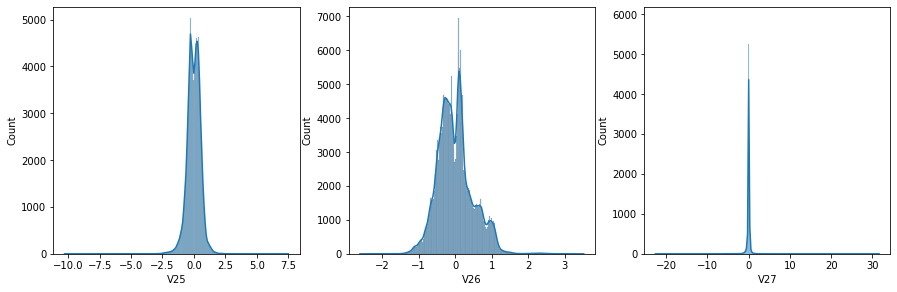

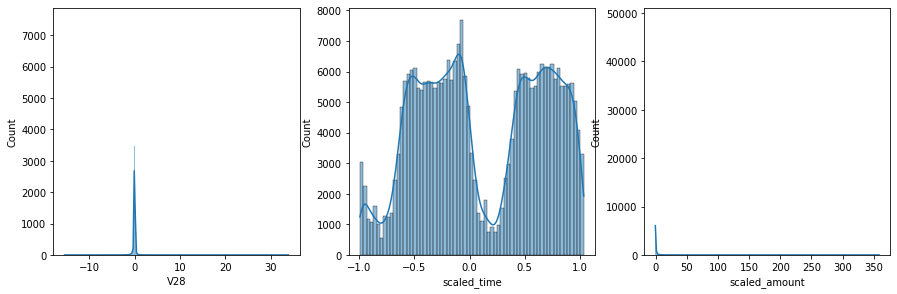

<Figure size 1080x720 with 0 Axes>

In [20]:
# Analysing histogram to check the distribution
plt.figure(figsize=(15,10))
c=1
for col in data_credit.columns:
    if (c<=3):
        plt.subplot(2,3,c)
        sns.histplot(data=data_credit, x=col, kde=True)
    c+=1
    if c==4:
        plt.figure(figsize=(15,10))
        c=1

<AxesSubplot:xlabel='Class', ylabel='count'>

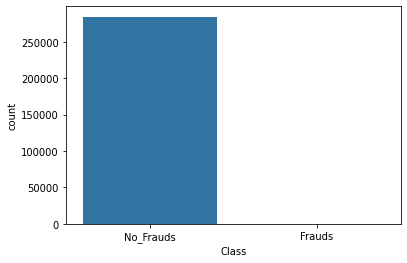

In [21]:
sns.countplot(data=target_data, x='Class')

In [22]:
target_data['Class'].value_counts(normalize=True)

No_Frauds    0.998273
Frauds       0.001727
Name: Class, dtype: float64

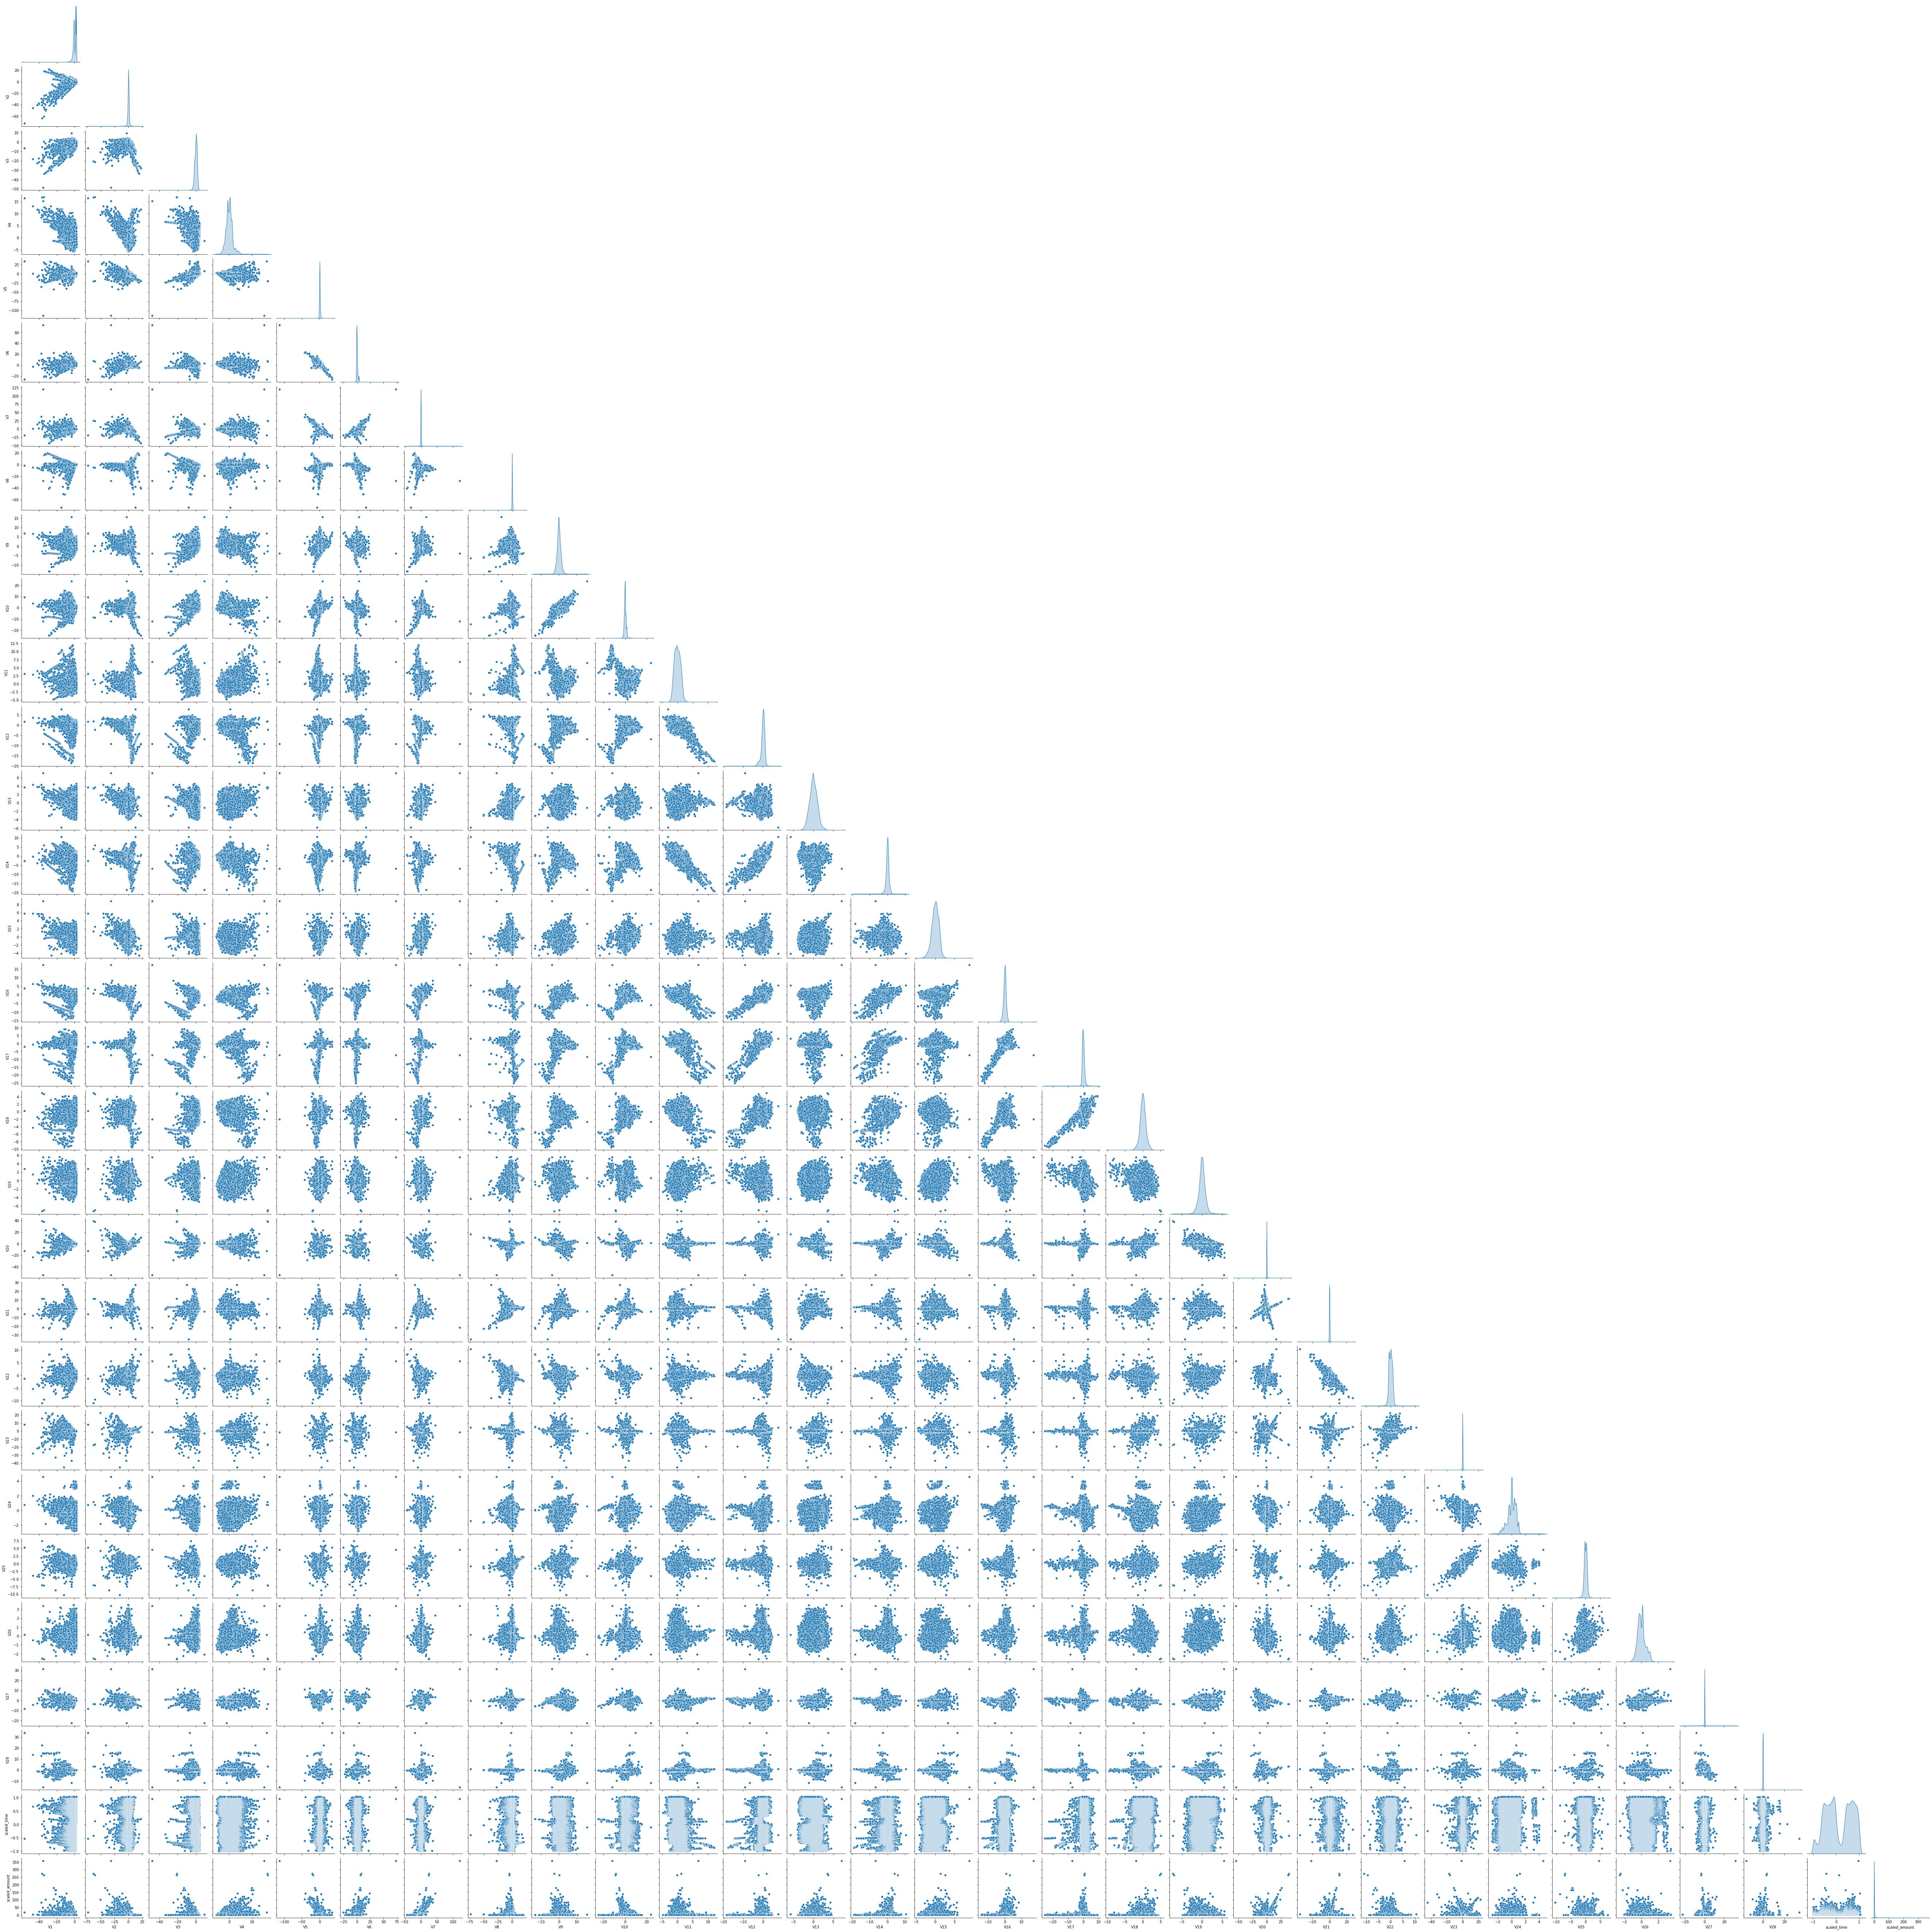

In [23]:
sns.pairplot(data=data_credit, diag_kind='kde', corner=True)

In [24]:
corel = data_credit.corr()
corel.round(2)

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  \
V1             1.00  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V2             0.00  1.00  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00   
V3            -0.00  0.00  1.00 -0.00 -0.00  0.00  0.00  0.00 -0.00  0.00   
V4             0.00 -0.00 -0.00  1.00 -0.00 -0.00  0.00  0.00  0.00  0.00   
V5             0.00 -0.00 -0.00 -0.00  1.00  0.00 -0.00  0.00  0.00 -0.00   
V6             0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00   
V7             0.00  0.00  0.00  0.00 -0.00  0.00  1.00 -0.00  0.00  0.00   
V8            -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  1.00  0.00  0.00   
V9             0.00 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00  1.00 -0.00   
V10            0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  1.00   
V11            0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00   
V12            0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
V13           -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V14            0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00   
V15           -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00   
V16            0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00   
V17           -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V18            0.00  0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  0.00  0.00   
V19            0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00   
V20            0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00   
V21           -0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00 -0.00  0.00  0.00   
V22            0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00   
V23            0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00  0.00  0.00   
V24            0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V25           -0.00 -0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00 -0.00   
V26           -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V27            0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00   
V28            0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00   
scaled_time    0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  0.03   
scaled_amount -0.23 -0.53 -0.21  0.10 -0.39  0.22  0.40 -0.10 -0.04 -0.10   

               ...   V21   V22   V23   V24   V25   V26   V27   V28  \
V1             ... -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00  0.00   
V2             ...  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00   
V3             ... -0.00  0.00  0.00 -0.00  0.00  0.00  0.00  0.00   
V4             ... -0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00   
V5             ... -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00   
V6             ... -0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00   
V7             ...  0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00   
V8             ... -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00   
V9             ...  0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00   
V10            ...  0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V11            ... -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00   
V12            ...  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
V13            ...  0.00 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00   
V14            ...  0.00  0.00  0.00  0.00 -0.00 -0.00  0.00  0.00   
V15            ...  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00 -0.00   
V16            ... -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00   
V17            ... -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00   
V18            ... -0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00   
V19            ...  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00 -0.00   
V20            ... -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00   
V21            ...  1.00  0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00   
V22            ...  0.00  1.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00   
V23            ... 

<AxesSubplot:>

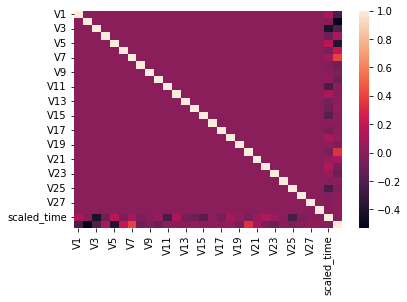

In [25]:
sns.heatmap(corel)

In [26]:
# Outlier Tretment
def get_bounds(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + (iqr*1.5)
    lower_bound = q1 - (iqr*1.5)
    return upper_bound, lower_bound

In [27]:
numcol = list(data_credit.columns)
for col in numcol:
    ub, lb = get_bounds(data_credit, col)
    data_credit[col] = np.where(data_credit[col]>ub, ub, data_credit[col])
    data_credit[col] = np.where(data_credit[col]<lb, lb, data_credit[col])

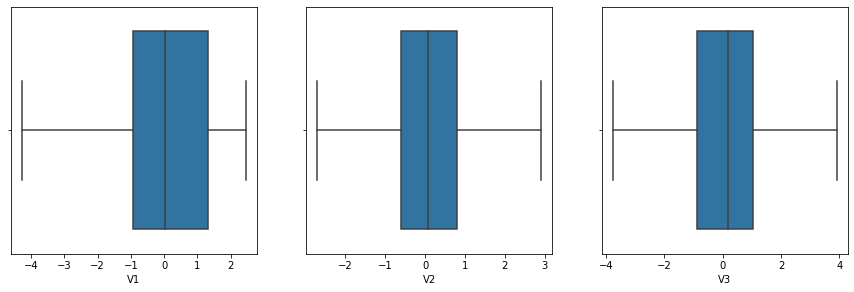

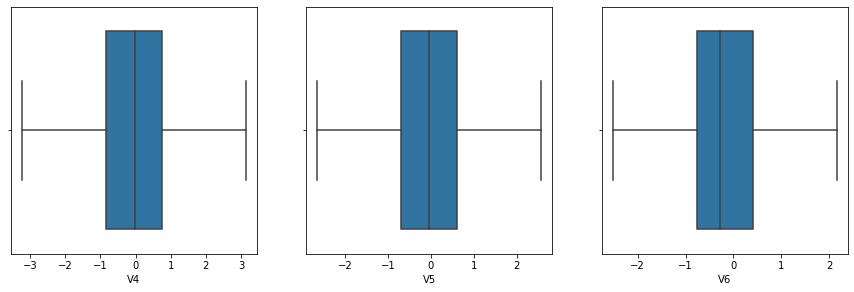

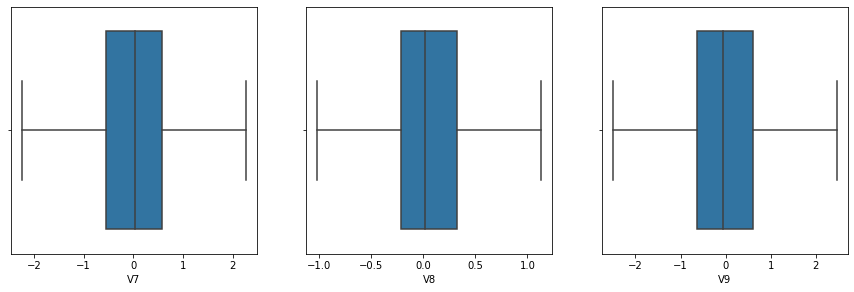

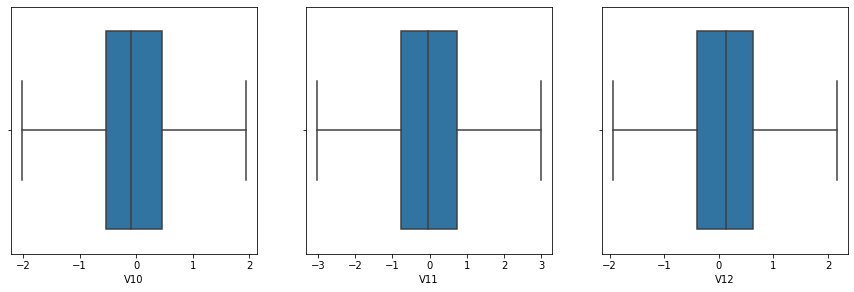

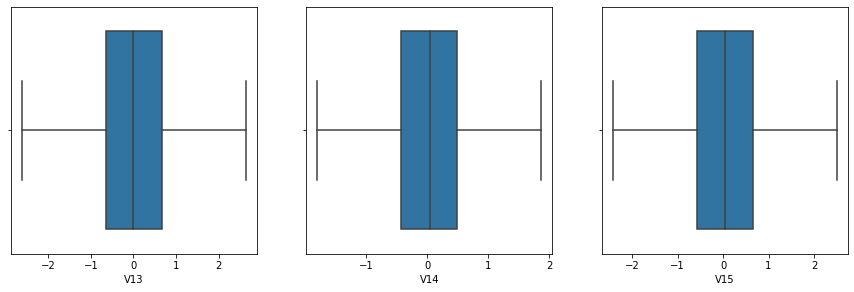

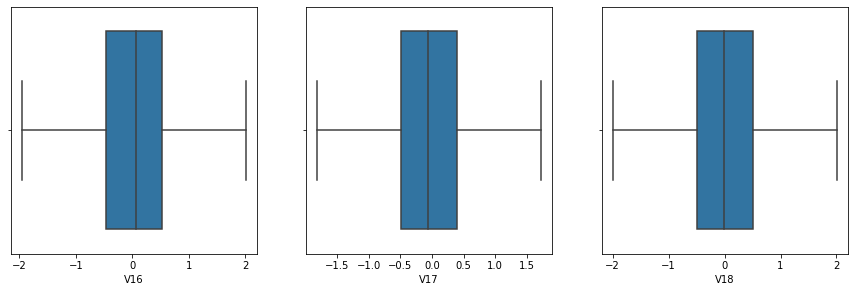

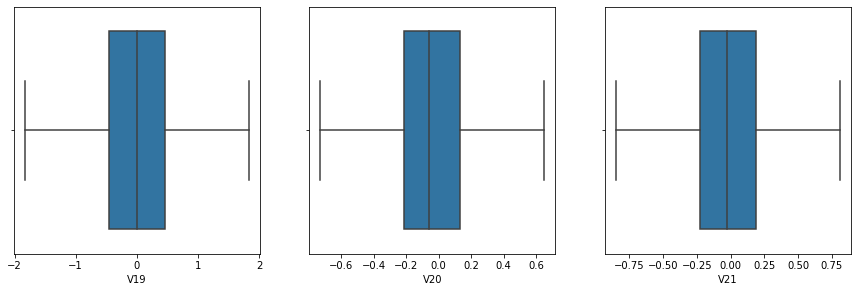

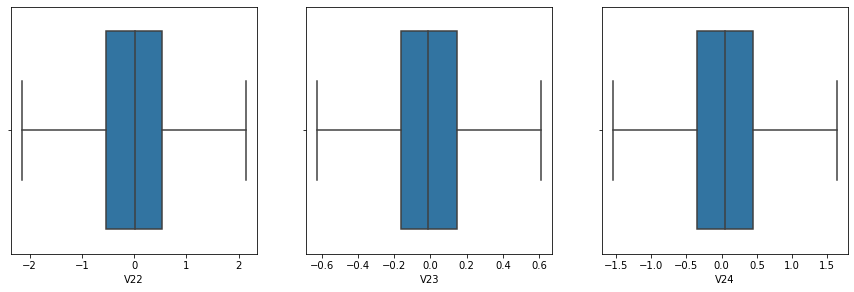

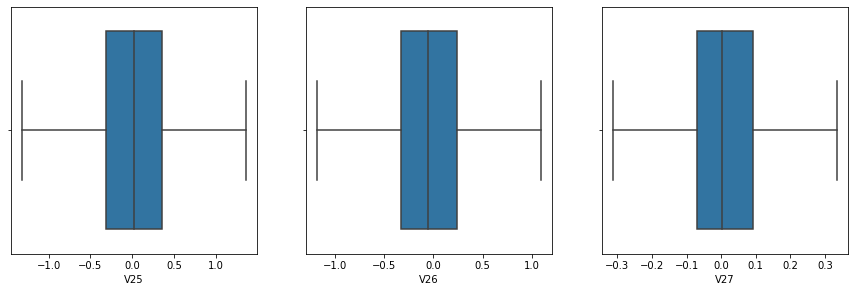

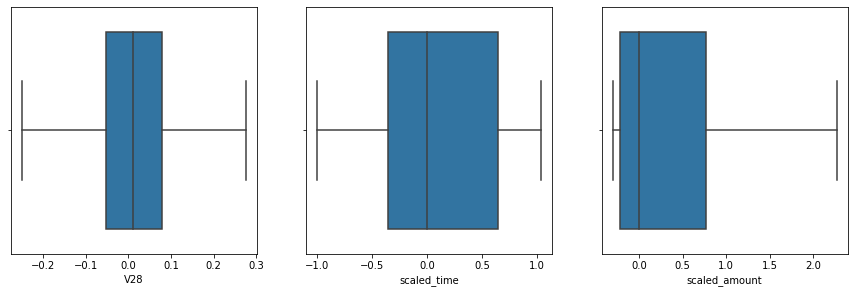

<Figure size 1080x720 with 0 Axes>

In [28]:
plt.figure(figsize=(15,10))
c=1
for col in data_credit.columns:
    if (c<=3):
        plt.subplot(2,3,c)
        sns.boxplot(data=data_credit, x=col)
    c+=1
    if c==4:
        plt.figure(figsize=(15,10))
        c=1

In [29]:
# Logistic Regression

In [30]:
#Importing Train Test Split function to split the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
# separate the target feature and the rest of the independent features. also drop the DATE feature
X = data_credit
Y = target_data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=100)

In [32]:
# create an instance of the model
lr_model = LogisticRegression()

In [33]:
# train the model on the train data
lr_model.fit(X_train,Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
# get the predictions on the training dataset observations
pred_train = lr_model.predict(X_train)
pred_test = lr_model.predict(X_test)

In [35]:
# preds on test data observations
pred_train[:10]

array(['No_Frauds', 'No_Frauds', 'No_Frauds', 'No_Frauds', 'No_Frauds',
       'No_Frauds', 'No_Frauds', 'No_Frauds', 'No_Frauds', 'No_Frauds'],
      dtype=object)

In [36]:
# import classification evaluation metrics functions from sklearn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [37]:
# train and test accuracy
acc_train = accuracy_score(Y_train, pred_train)
acc_test = accuracy_score(Y_test, pred_test)
acc_train, acc_test

(0.9994783411247767, 0.9992275552122467)

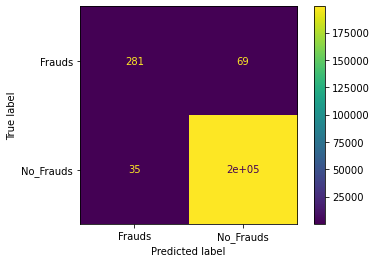

In [38]:
# train & test confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_train, pred_train)
plt.grid(False);

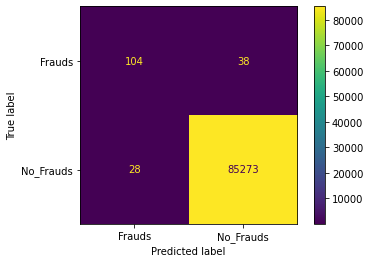

In [39]:
ConfusionMatrixDisplay.from_predictions(Y_test, pred_test)
plt.grid(False);

In [40]:
# train and test classification report
print(classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

      Frauds       0.89      0.80      0.84       350
   No_Frauds       1.00      1.00      1.00    199014

    accuracy                           1.00    199364
   macro avg       0.94      0.90      0.92    199364
weighted avg       1.00      1.00      1.00    199364



In [41]:
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

      Frauds       0.79      0.73      0.76       142
   No_Frauds       1.00      1.00      1.00     85301

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [42]:
# Here we will consider precision as the correct predicton and we are getting value as 0.79 i.e; 79% predticion
# which is quit good.